In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#reading the car dataset
df = pd.read_csv(r'C:\Users\Paarth\Desktop\Datasets\car.csv')
df.head(5)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
#analysing dataset
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,med,med,2,2,med,med,unacc
freq,432,432,432,576,576,576,1210


In [4]:
#rows,collumns
df.shape

(1728, 7)

In [5]:
#data types
df.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [6]:
#counting the unique attributes in each collumn
for i in df.columns:
    print(df[i].unique(),"\t",df[i].nunique())

['vhigh' 'high' 'med' 'low'] 	 4
['vhigh' 'high' 'med' 'low'] 	 4
['2' '3' '4' '5more'] 	 4
['2' '4' 'more'] 	 3
['small' 'med' 'big'] 	 3
['low' 'med' 'high'] 	 3
['unacc' 'acc' 'vgood' 'good'] 	 4


In [7]:
#Checking how the unique categories are distributed among the columns
for i in df.columns:
    print(df[i].value_counts())
    print()

med      432
high     432
low      432
vhigh    432
Name: buying, dtype: int64

med      432
high     432
low      432
vhigh    432
Name: maint, dtype: int64

2        432
5more    432
3        432
4        432
Name: doors, dtype: int64

2       576
more    576
4       576
Name: persons, dtype: int64

med      576
big      576
small    576
Name: lug_boot, dtype: int64

med     576
high    576
low     576
Name: safety, dtype: int64

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64



In [8]:
#check for missing values
df.isna().sum()
#we can see we have no missing values in the dataset

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [9]:
#counting the value of each category in clss collumn 
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

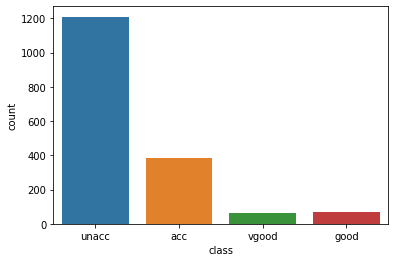

In [10]:
#plotting the class collumn
sns.countplot(df['class'])

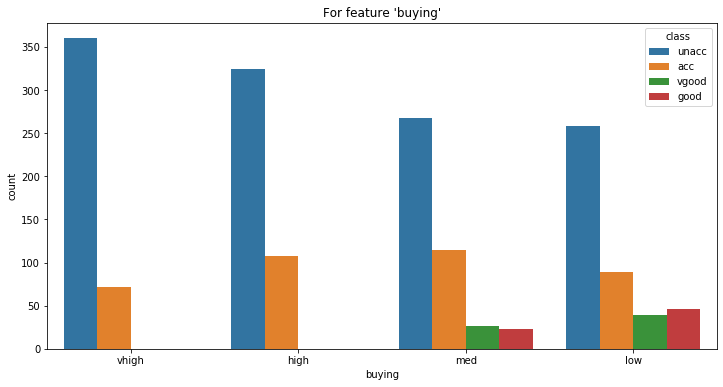

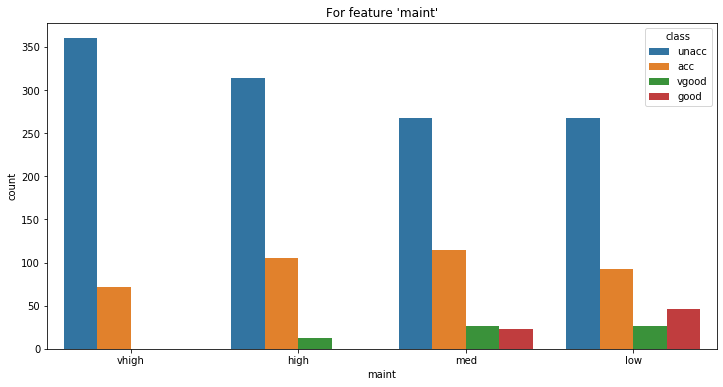

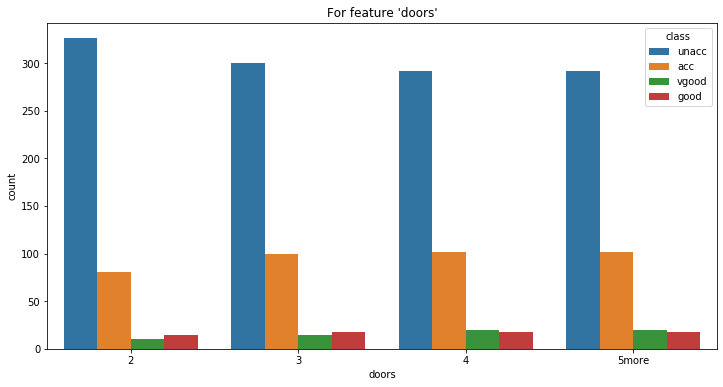

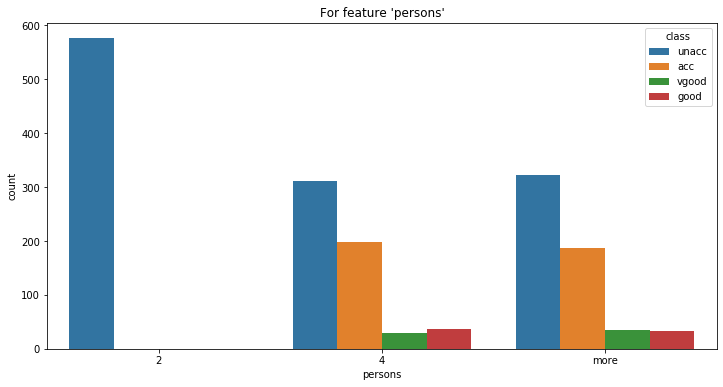

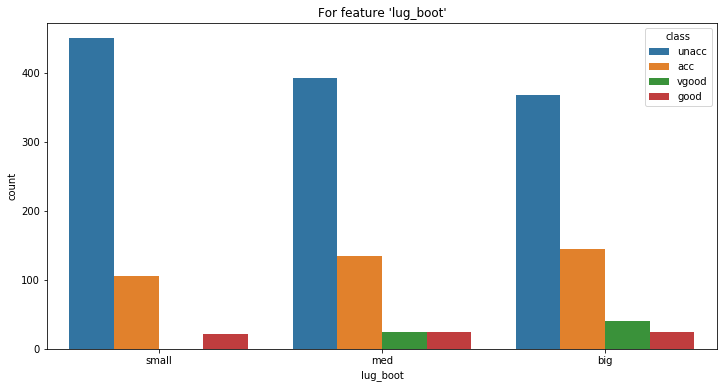

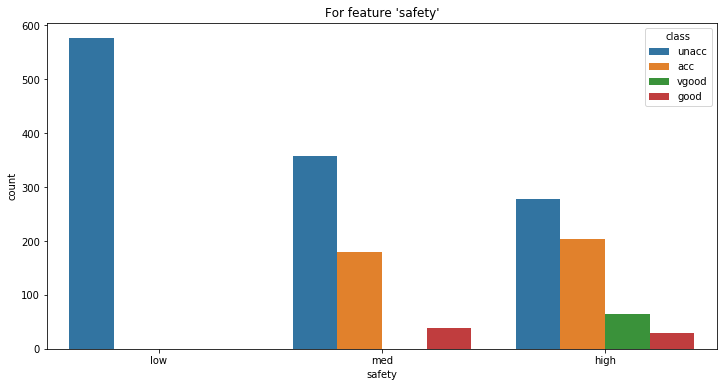

In [11]:
for i in df.columns[:-1]:
    plt.figure(figsize=(12,6))
    plt.title("For feature '%s'"%i)
    sns.countplot(df[i],hue=df['class'])

In [12]:
#scikit-learn algorithms do not work with string values,so we will convert string categories to integers.
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    df[i]=le.fit_transform(df[i])
df.head(5)

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [13]:
#X is the dataframe containing input data / features from which we will predict
#y is the series which has results which are to be predicted.
X=df[df.columns[:-1]]
y=df['class']

In [14]:
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2


In [15]:
#spliting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [17]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='newton-cg',multi_class='multinomial')
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
pred = logreg.predict(X_test)

In [19]:
logreg.score(X_test,y_test)
#accuracy achieved is around 69%

0.6907514450867052

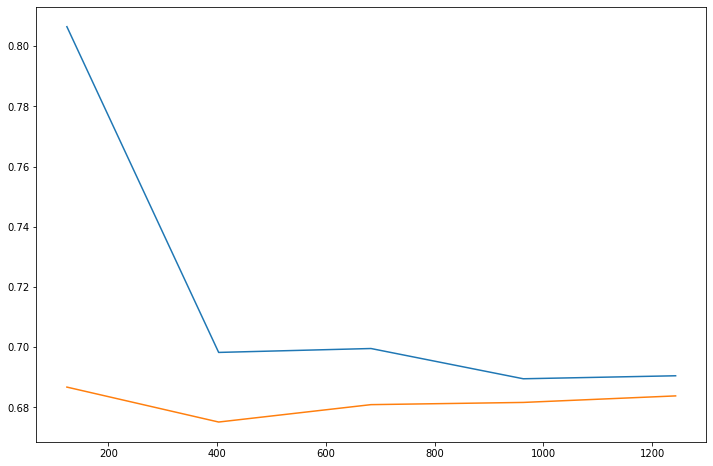

In [20]:
#learning curve for logistic regression
from sklearn.model_selection import learning_curve,cross_val_score,validation_curve
lc=learning_curve(logreg,X_train,y_train,cv=10,n_jobs=-1)
size=lc[0]
train_score=[lc[1][i].mean() for i in range (0,5)]
test_score=[lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(12,8))
plt.plot(size,train_score)
plt.plot(size,test_score)

In [21]:
print('Logistic regression\n', classification_report(y_test, pred))

Logistic regression
               precision    recall  f1-score   support

           0       0.24      0.11      0.15        70
           1       0.00      0.00      0.00        10
           2       0.77      0.90      0.83       252
           3       0.21      0.21      0.21        14

    accuracy                           0.69       346
   macro avg       0.30      0.31      0.30       346
weighted avg       0.61      0.69      0.64       346



C:\Users\Paarth\Documents\Downloads\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
#As it is a multiclass classification, we tired using 'newton-cg','sag','lgfbs' solvers.
#As this dataset is smaller, we can use GridSearch to get best possible parameters
param_grid={'C':[0.01,0.1,1,10],'solver':['newton-cg', 'lbfgs', 'sag'],'multi_class':['multinomial']}
grid=GridSearchCV(estimator=LogisticRegression(n_jobs=-1),param_grid=param_grid,cv=5,n_jobs=-1)

In [23]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=-1, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'multi_class': ['multinomial'],
                         'solver': ['newton-cg', 'lbfgs', 'sag']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [24]:
print(grid.best_params_)
print(grid.best_score_)
#we are getting low accuracy of 70% with logistic regression

{'C': 0.01, 'multi_class': 'multinomial', 'solver': 'newton-cg'}
0.7004578035891802


In [25]:
#predicting the class by giving values for other collumns
prediction = logreg.predict([[2, 2, 4, 4, 1, 0]])
print(prediction)

[3]


In [26]:
#NBC 
#As logistic regression didn't give accuracy, we will now try NBC classification
#we will try Bernoulli Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(X_train,y_train)
pred=gnb.predict(X_test)
gnb.score(X_test,y_test)
#we are again getting even lower accuracy of around 61% 

0.6069364161849711

In [27]:
print('Naive Bayes Classifier\n', classification_report(y_test,pred))

Naive Bayes Classifier
               precision    recall  f1-score   support

           0       0.18      0.04      0.07        70
           1       0.00      0.00      0.00        10
           2       0.91      0.77      0.83       252
           3       0.12      1.00      0.22        14

    accuracy                           0.61       346
   macro avg       0.30      0.45      0.28       346
weighted avg       0.70      0.61      0.63       346



C:\Users\Paarth\Documents\Downloads\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


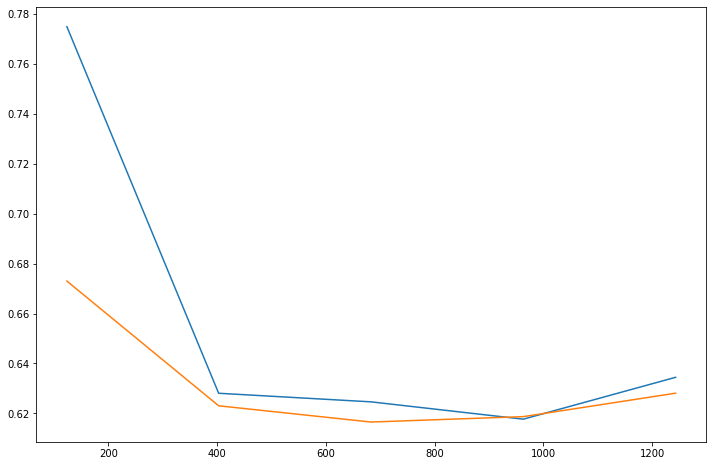

In [28]:
#learning curve for Gaussian Naive Bayes Classifier
lc = learning_curve(gnb,X_train,y_train,cv=10,n_jobs=-1)
size=lc[0]
train_score=[lc[1][i].mean() for i in range (0,5)]
test_score=[lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(12,8))
plt.plot(size,train_score)
plt.plot(size,test_score)
#Why Grid Search is not performed for Naive Bayes Classifier?
#because NBC doesn't have any hyperparameters to tune.

In [29]:
#KNN classification
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
knn.score(X_test,y_test)
#we get accuracy of 91.6%

0.9161849710982659

In [30]:
print('KNN classification\n',classification_report(y_test,pred))

KNN classification
               precision    recall  f1-score   support

           0       0.89      0.79      0.83        70
           1       0.75      0.30      0.43        10
           2       0.93      1.00      0.96       252
           3       0.89      0.57      0.70        14

    accuracy                           0.92       346
   macro avg       0.86      0.66      0.73       346
weighted avg       0.91      0.92      0.91       346



In [31]:
#Now we will check for various parameters for 'n_neighbours'
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X,y)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 49
Best p: 2
Best n_neighbors: 5


In [32]:
knn=KNeighborsClassifier(leaf_size=49, p=2)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
knn.score(X_test,y_test)
#we get accuracy of 92.4% the accuracy increased using suitable value for parameters

0.9248554913294798

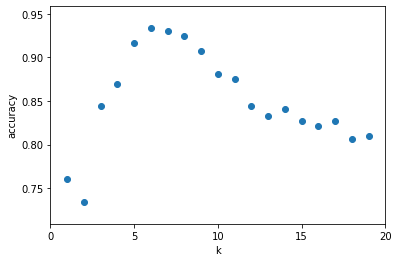

In [33]:
#How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?
k_range = range(1,20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

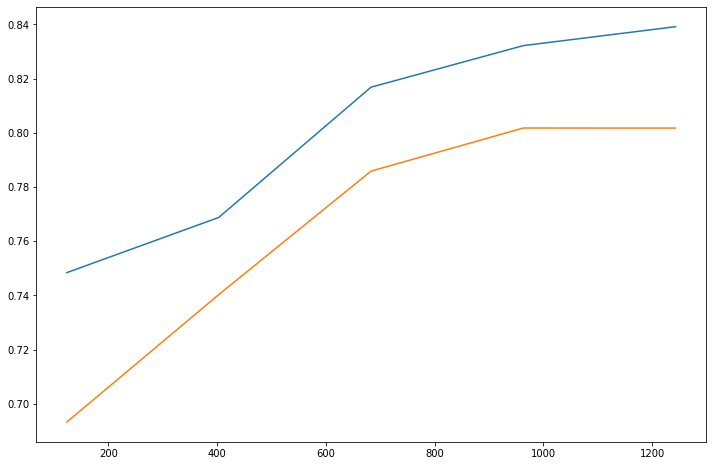

In [34]:
#learning curve for KNN classifier
lc = learning_curve(knn,X_train,y_train,cv=10,n_jobs=-1)
size=lc[0]
train_score=[lc[1][i].mean() for i in range (0,5)]
test_score=[lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(12,8))
plt.plot(size,train_score)
plt.plot(size,test_score)

In [35]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_jobs=-1,random_state=50)

In [36]:
rfc.fit(X_train,y_train)
pred = rfc.predict(X_test)
rfc.score(X_test,y_test)
#we get accuracy of 98.5%

0.9855491329479769

In [37]:
#checking for best parameters
param_grid={'criterion':['gini','entropy'],'max_depth':[2,5,10,20],'max_features':[2,4,6,'auto'],'max_leaf_nodes':[2,3,None],}

In [38]:
grid=GridSearchCV(estimator=RandomForestClassifier(n_estimators=50,n_jobs=-1,random_state=51),param_grid=param_grid,cv=10,n_jobs=-1)

In [39]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=50, n_jobs=-1,
                                              oob_score=False, random_state=51,
                                    

In [40]:
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'entropy', 'max_depth': 20, 'max_features': 6, 'max_leaf_nodes': None}
0.9804608487123344


In [41]:
print('Random FOrest Classifier\n',classification_report(y_test,pred))

Random FOrest Classifier
               precision    recall  f1-score   support

           0       0.99      0.96      0.97        70
           1       0.80      0.80      0.80        10
           2       1.00      1.00      1.00       252
           3       0.88      1.00      0.93        14

    accuracy                           0.99       346
   macro avg       0.92      0.94      0.93       346
weighted avg       0.99      0.99      0.99       346



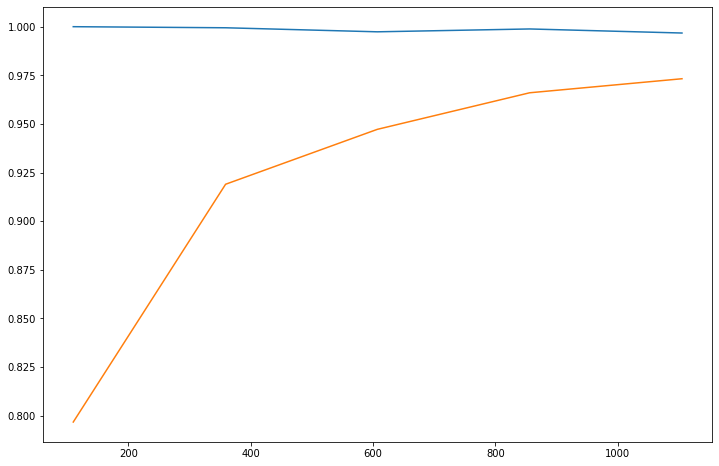

In [42]:
#learning curve for Random Forest classifier
lc=learning_curve(RandomForestClassifier(n_estimators=50,criterion='entropy',max_features=6,max_depth=10,random_state=51,max_leaf_nodes=None,n_jobs=-1,),X_train,y_train,cv=5,n_jobs=-1)
size=lc[0]
train_score=[lc[1][i].mean() for i in range (0,5)]
test_score=[lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(12,8))
plt.plot(size,train_score)
plt.plot(size,test_score)

In [43]:
#Model is overfitting as train accuracy is 1 ,but test accuracy is much less.
#we have already tried changing RFC parameters to tackle overfitting. But, still it is not reduced. To reduce variance, we can
#1)increase number of samples. (It is clear from above graph that incresing number of samples will improve model)
#2)Reduce number of features
print(X.columns)
print(rfc.feature_importances_)
#From feature importances, it is clear that 'doors' and 'lug_boot' feature is least important. So, we will train our model excluding these feature.

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')
[0.19939765 0.15983632 0.06506071 0.22271826 0.08858349 0.26440358]


In [44]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X[['buying', 'maint', 'persons', 'safety']],y, test_size=0.3, random_state=42)

In [45]:
rfc1=RandomForestClassifier(n_estimators=50,criterion='entropy',max_features=4,max_depth=10,random_state=51,max_leaf_nodes=None,n_jobs=-1)
rfc1.fit(X_train1,y_train1)
rfc1.score(X_test1,y_test1)
#Our data already has less features and even if we drop the least important feature, then also the accuracy is reducing to 84.58%
#So, dropping a feature is not an option to reduce variance in our model.
#The only option we are left with is to get more data.

0.8458574181117534

In [46]:
#Support Vector Classification
from sklearn.svm import SVC
svc = SVC(random_state=0)
svc.fit(X_train,y_train)
pred = svc.predict(X_test)
svc.score(X_test,y_test)

0.930635838150289

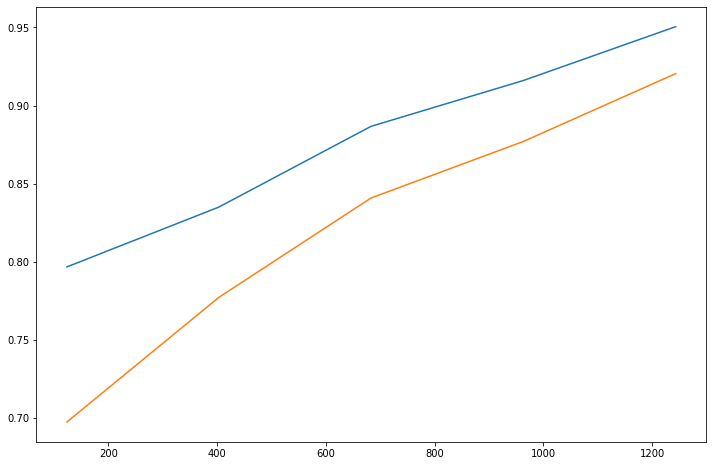

In [47]:
#learning curve for SVC
lc=learning_curve(svc,X_train,y_train,cv=10,n_jobs=-1)
size=lc[0]
train_score=[lc[1][i].mean() for i in range (0,5)]
test_score=[lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(12,8))
plt.plot(size,train_score)
plt.plot(size,test_score)

In [48]:
print('Support Vector Classification\n', classification_report(y_test, pred))

Support Vector Classification
               precision    recall  f1-score   support

           0       0.90      0.76      0.82        70
           1       0.80      0.40      0.53        10
           2       0.94      1.00      0.97       252
           3       0.88      1.00      0.93        14

    accuracy                           0.93       346
   macro avg       0.88      0.79      0.81       346
weighted avg       0.93      0.93      0.93       346



In [49]:
#searching for best parameters for svc
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
# fitting the model for grid search 
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.693, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.693, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.692, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.692, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.696, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.693, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.693, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.692, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.692, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    7.8s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [50]:
# print best parameter after tuning 
print(grid.best_params_)
print(grid.best_score_)
#we get ccuracy of 98.98%

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
0.9898681525663161


In [51]:
#Conclusion
#Support Vector Classifier is the best suitable model for this data with following parameters:'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'
#We achieve 98.98% accuracy with this model
#an the least suitable model is Naive Bayes Classifier with accuracy of 60.69%